# Одномерное уравнение теплопроводности с зависящим от температуры коэффициентом теплопроводности

Представим бесконечно тонкую и длинную металлическую пластину. Будем нагревать её с двух сторон так, чтобы на обоих концах температура была постоянной (может быть, разной). Необходимо вычислить температуру в каждой точке пластины в любой момент времени. Однако эта задача представляется сложной, поэтому разобьём временной отрезок на конченое множество моментов с фиксированной разницей между ними tau. Так же поступим и с координатой x. Теперь нам надо вычислить температуру в конечном множестве пар (время t, координата x). 

Напишем программу для решения данной задачи:

Создадим фунцию, вычисляющую коэффициент теплопроводности в зависимости от температуры
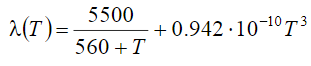

In [16]:
mf = 500

def lamda(x):
    return 5500 / (560 + x) + 0.942 * 10**(-10) * x**3

Нелинейное одномерное уравнение теплопроводности в этом случае будет иметь вид
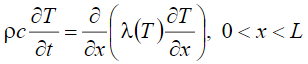

Для этого уравнения рассмотрим краевую задачу:
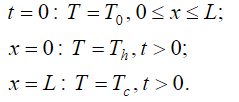

Заведём массивы для хранения температуры и прогоночных коэффициентов

In [17]:
T = [0 for i in range(mf)]
alfa = [0 for i in range(mf)]
beta = [0 for i in range(mf)]

Нам надо определить количество узлов, в которых необходимо вычислить температуру, конечный момент, а также физические характеристики пластины: толщину, плотность материала, теплоёмкость, начальную температуру пластины и постоянную температуру на обоих концах.
Если пластина изготовлена из диоксида урана, то плотность ro  =  10950  кг/м3, теплоёмкость с  =  236  Дж/(кг⋅К). Пластина с размером L = 5.0. На границах поддерживаются постоянные температуры 373 K при x = 0 и 363 K при x = L. Начальная температура области решени T = 323 K.

In [18]:
N = 200
t_end = 600
L = 0.5
ro = 10950
c = 236
T0 = 323
Th = 373
Tc = 363

Опеделяем расчетные шаги сетки по пространственной координате и времени, а также поле температуры в начальный момент

In [19]:
h = L/(N-1)
tau = t_end/100.0
for i in range(N):
    T[i] = T0

Проводим интегрирование нестационарного уравнения теплопроводности

In [20]:
time_number = 5
Times = [[0 for i in range(N-1)] for i in range(time_number-1)]
# T1 = []
time = 0
k = 0
k1 = 0
control_times = []
step = t_end//tau//time_number
for i in range(1, time_number):
    control_times.append(step*i)

while True:
    k += 1
    if time >= t_end:
        break
    # увеличиваем переменную времени на шаг τ
    time += tau
    # определяем начальные прогоночные коэффициенты на основе левого граничного условия
    alfa[1] = 0.0
    beta[1] = Th
    for i in range(2, N+1):
#         ai, bi, ci, fi – коэффициенты канонического представления системы уравнений с трехдиагональной матрицей
        ai = 0.5*(lamda(T[i])+lamda(T[i+1]))/h**2
        ci = 0.5*(lamda(T[i-1])+lamda(T[i]))/h**2
        bi = ai+ci+ro*c/tau
        fi = -ro*c*T[i]/tau
#         {alfa[i], beta[i] – прогоночные коэффициенты}
        alfa[i] = ai/(bi-ci*alfa[i-1])
        beta[i] = (ci*beta[i-1]-fi)/(bi-ci*alfa[i-1])
#     {определяем значение температуры на правой границе на основе правого граничного условия}
    T[N] = Tc 
#     {используя соотношение (7) определяем неизвестное поле температуры}
    for i in range(N-1, 0, -1):
        T[i] = alfa[i]*T[i+1]+beta[i]

    if k in control_times:
        k1 += 1
        for i in range(1, N-1):
            Times[k1-1][i] = T[i]-273

Выводим результат

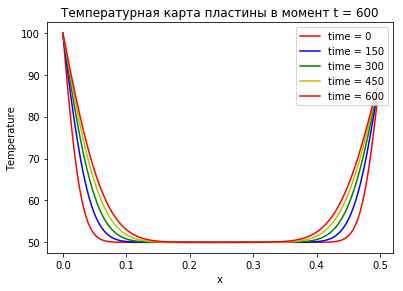

In [22]:
from pylab import *
# print('Толщина пластины L = ', L)
# print('Число узлов по координате N = ', N)
# print('Плотность материала пластины ro = ', ro)
# print('Теплоемкость материала пластиныс = ', c)
# print('Начальная температура  T0 = ', T0)
# print('Температура на границе x = 0, Th = ', Th)
# print('Температура на границе x = L, Tc = ', Tc)
# print('Результат получен с шагом по координате h = ', h)
# print('Результат получен с шагом по времени tau = ', tau)
# print('Температурное поле в момент времени t = ', t_end)

# for i in range(N):
#     print("x = " + str(h*(i-1)) + " t = " + str(T[i]-273))
    
%matplotlib inline

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
x = [h*(i-1) for i in range(1, N-1)]
colours = ['r', 'b', 'g', 'y', 'p']
for i in range(len(Times)):
    axes.plot(x, Times[i][1:N-1], colours[i], label="time = " + str(t_end//len(Times)*i))
y = [T[i]-273 for i in range(1, N-1)]
axes.plot(x, y, 'r', label="time = " + str(t_end))
axes.legend(loc=1)
axes.set_xlabel('x')
axes.set_ylabel('Temperature')
axes.set_title('Температурная карта пластины в момент t = ' + str(t_end))
# axes.set_ylim(50, 60)
show()


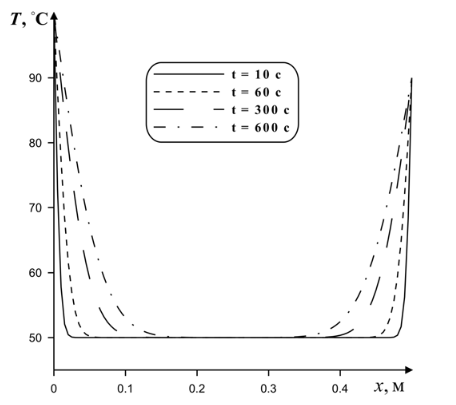